In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Loading the Data and Selecting the Features

## Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('/content/drive/MyDrive/Jovian/Credit/loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('/content/drive/MyDrive/Jovian/Credit/loan_data_targets_train.csv', index_col = 0, header = 0)
loan_data_inputs_test = pd.read_csv('/content/drive/MyDrive/Jovian/Credit/loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('/content/drive/MyDrive/Jovian/Credit/loan_data_targets_test.csv', index_col = 0, header = 0)

## Explore Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,0,0,0,1,0,0,0,0,0,0
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,0,1,0,1,0,0,0,0,0,0
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,0,0,0,1,0,0,0,0,0,0
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,0,0,0,1,0,0,0,0,0,0
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,0,0,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [5]:
print(loan_data_inputs_train.shape)
print(loan_data_targets_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_test.shape)

(93257, 324)
(93257, 1)
(93257, 324)
(93257, 1)


### Selecting the Features

In [6]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [7]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [8]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


## PD Model Estimation

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
# We create an instance of an object from the 'LogisticRegression' class.

reg = LogisticRegression()

In [11]:
# Sets the pandas dataframe options to display all columns/ rows.
pd.options.display.max_rows = None

In [12]:
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

reg.fit(inputs_train,loan_data_targets_train)

LogisticRegression()

In [13]:
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.intercept_

array([-1.5028445])

In [14]:
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.coef_

array([[ 0.2113464 ,  0.590853  ,  0.51731336,  0.5043453 ,  0.42248913,
         0.37415404,  0.08430772,  0.12220444,  0.18358644,  0.08044037,
         0.1495152 ,  0.13442995,  0.11441435,  0.20849524,  0.14315931,
         0.26102049,  0.32736304,  0.32783929,  0.36572069,  0.41833966,
         0.42229711,  0.15420455,  0.09827702,  0.45487   ,  0.30038826,
         0.30731122,  0.38881135,  0.25261333,  0.05488634,  0.13971223,
         0.07899385,  0.0206701 ,  0.10304803,  0.14736331,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.90643685,  0.98171957,  0.61031148,  0.20886745,
         0.22510761,  0.02554167, -0.06853995, -0.0987878 , -0.02612473,
        -0.08879552, -0.10837179,  1.05557061,  0.84879114,  0.66788419,
        -0.32493742, -0.21029863, -0.21466427, -0.19838097, -0.17800932,
        -0.21981538, -0.14825574, -0.27505688, -0.27849989, -0.07272061,
        -0.18979794, -0.06648854,  0.07112004,  0.1

In [15]:
# Stores the names of the columns of a dataframe in a variable.
feature_name = inputs_train.columns.values

In [16]:
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]] # Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index() # Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,-1.502844
1,grade:A,0.211346
2,grade:B,0.590853
3,grade:C,0.517313
4,grade:D,0.504345
5,grade:E,0.422489
6,grade:F,0.374154
7,home_ownership:OWN,0.084308
8,home_ownership:MORTGAGE,0.122204
9,addr_state:NM_VA,0.183586


### Build a Logistic Regression Model with P-Values

In [17]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(max_iter=1000,*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        from sklearn.feature_selection import chi2
        scores, pvalues = chi2(inputs_train, loan_data_targets_train)
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        #self.z_scores = z_scores
        self.p_values = pvalues

In [18]:
reg = LogisticRegression_with_p_values()
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [19]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

In [20]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.712184
1,grade:A,0.189890
2,grade:B,0.589775
3,grade:C,0.518921
4,grade:D,0.508054
5,grade:E,0.429487
6,grade:F,0.385259
7,home_ownership:OWN,0.083699
8,home_ownership:MORTGAGE,0.122836
9,addr_state:NM_VA,0.189943


In [21]:
# This is a list.
p_values = reg.p_values
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.

In [22]:
# Add the intercept for completeness.
p_values = np.append(np.nan, np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.

In [23]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [24]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.712184,NaN
1,grade:A,0.189890,4.184145e-175
2,grade:B,0.589775,1.406305e-65
3,grade:C,0.518921,7.163921e-05
4,grade:D,0.508054,4.506847e-76
5,grade:E,0.429487,7.191341e-119
6,grade:F,0.385259,4.177420e-82
7,home_ownership:OWN,0.083699,5.254365e-01
8,home_ownership:MORTGAGE,0.122836,2.173556e-22
9,addr_state:NM_VA,0.189943,5.390194e-01


In [25]:
# We are going to remove some features, the coefficients for all or almost all of the dummy variables for which,
# are not statistically significant.
# Like delinq_2yrs has P-value higher than 5% so we will remove delinq_2yrs feature

# We do that by specifying another list of dummy variables as reference categories, and a list of variables to remove.
# Then, we are going to drop the two datasets from the original list of dummy variables.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [26]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [27]:
# Here we run a new model.
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

In [28]:
#model for deploymeny
reg_deployment = linear_model.LogisticRegression(max_iter=1000)
reg_deployment.fit(inputs_train, loan_data_targets_train)

LogisticRegression(max_iter=1000)

In [29]:
feature_name = inputs_train.columns.values

In [30]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.884811
1,grade:A,0.213052
2,grade:B,0.631913
3,grade:C,0.550554
4,grade:D,0.529365
5,grade:E,0.438347
6,grade:F,0.391157
7,home_ownership:OWN,0.102818
8,home_ownership:MORTGAGE,0.134455
9,addr_state:NM_VA,0.188197


In [31]:
# We add the 'p_values' here, just as we did before.
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table
# Here we get the results for our final PD model.

,Feature name,Coefficients,p_values
0,Intercept,-1.884811,NaN
1,grade:A,0.213052,4.184145e-175
2,grade:B,0.631913,1.406305e-65
3,grade:C,0.550554,7.163921e-05
4,grade:D,0.529365,4.506847e-76
5,grade:E,0.438347,7.191341e-119
6,grade:F,0.391157,4.177420e-82
7,home_ownership:OWN,0.102818,5.254365e-01
8,home_ownership:MORTGAGE,0.134455,2.173556e-22
9,addr_state:NM_VA,0.188197,5.390194e-01


In [32]:
import pickle

In [33]:
pickle.dump(reg2, open('/content/drive/MyDrive/Jovian/Credit/models/pd_model.sav', 'wb'))
pickle.dump(reg_deployment, open('/content/drive/MyDrive/Jovian/Credit/models/pd_model_deployment.sav', 'wb'))

# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

## PD Model Validation (Test)

### Out-of-sample validation (test)

In [34]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-52',
'months_since_issue_d:53-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:141-164',
'months_since_earliest_cr_line:165-247',
'months_since_earliest_cr_line:248-270',
'months_since_earliest_cr_line:271-352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [35]:
# And here, in the list below, we keep the variable names for the reference categories,
# only for the variables we used in our final PD model.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [36]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [37]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [38]:
y_hat_test
# This is an array of predicted discrete classess (in this case, 0s and 1s).

array([1, 1, 1, ..., 1, 1, 1])

In [39]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [40]:
y_hat_test_proba
# This is an array of arrays of predicted class probabilities for all classes.
# In this case, the first value of every sub-array is the probability for the observation to belong to the first class, i.e. 0,
# and the second value is the probability for the observation to belong to the first class, i.e. 1.

array([[0.10224112, 0.89775888],
       [0.16353975, 0.83646025],
       [0.07502376, 0.92497624],
       ...,
       [0.02859307, 0.97140693],
       [0.0476728 , 0.9523272 ],
       [0.03932522, 0.96067478]])

In [41]:
y_hat_test_proba[:][:,1]
# Here we take all the arrays in the array, and from each array, we take all rows, and only the element with index 1,
# that is, the second element.
# In other words, we take only the probabilities for being 1.

array([0.89775888, 0.83646025, 0.92497624, ..., 0.97140693, 0.9523272 ,
       0.96067478])

In [42]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.

In [43]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.89775888, 0.83646025, 0.92497624, ..., 0.97140693, 0.9523272 ,
       0.96067478])

In [44]:
loan_data_targets_test_temp = loan_data_targets_test

In [45]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [46]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [47]:
df_actual_predicted_probs.shape

(93257, 2)

In [48]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [49]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [50]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.897759
288564,1,0.836460
213591,1,0.924976
263083,1,0.928254
165001,1,0.972417


In [51]:
tr = 0.9
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [52]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.

Predicted,0,1
Actual,,
0,7354,2836
1,37140,45927


In [53]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]
# Here we divide each value of the table by the total number of observations,
# thus getting percentages, or, rates.

Predicted,0,1
Actual,,
0,0.078857,0.030411
1,0.398254,0.492478


In [54]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.897759,0
288564,1,0.836460,0
213591,1,0.924976,1
263083,1,0.928254,1
165001,1,0.972417,1


In [55]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]
# Here we calculate Accuracy of the model, which is the sum of the diagonal rates.

0.5713351276579774

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.        , 0.        , 0.        , ..., 0.99970559, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 6.74154598e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99382968, 0.99382968, 0.98873048, ..., 0.40662392, 0.35868495,
        0.27916847]))

In [58]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

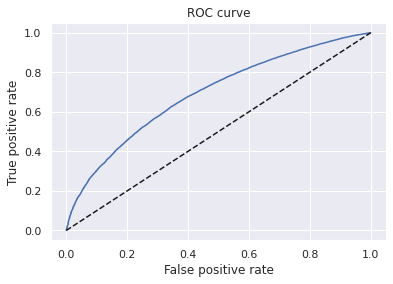

In [60]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [64]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

0.6910915958650167

### Gini and Kolmogorov-Smirnov

In [65]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.

In [66]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.279168,0
42344,1,0.304756,0
39810,0,0.358685,0
42396,0,0.365036,0
40518,0,0.405184,0


In [67]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
244354,1,0.991878,1
281703,1,0.992173,1
309492,1,0.992450,1
314806,1,0.992852,1
284281,1,0.993830,1


In [68]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.

In [69]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.279168,0
1,42344,1,0.304756,0
2,39810,0,0.358685,0
3,42396,0,0.365036,0
4,40518,0,0.405184,0


In [70]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [71]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.279168,0,1,1,0
1,42344,1,0.304756,0,2,2,0
2,39810,0,0.358685,0,3,2,1
3,42396,0,0.365036,0,4,2,2
4,40518,0,0.405184,0,5,2,3


In [72]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [73]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.279168,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.304756,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.358685,0,3,2,1,0.000032,0.000024,0.000098
3,42396,0,0.365036,0,4,2,2,0.000043,0.000024,0.000196
4,40518,0,0.405184,0,5,2,3,0.000054,0.000024,0.000294


In [74]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,244354,1,0.991878,1,93253,83063,10190,0.999957,0.999952,1.0
93253,281703,1,0.992173,1,93254,83064,10190,0.999968,0.999964,1.0
93254,309492,1,0.992450,1,93255,83065,10190,0.999979,0.999976,1.0
93255,314806,1,0.992852,1,93256,83066,10190,0.999989,0.999988,1.0
93256,284281,1,0.993830,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

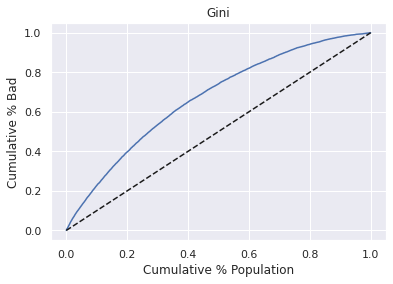

In [75]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [76]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini

0.38218319173003334

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

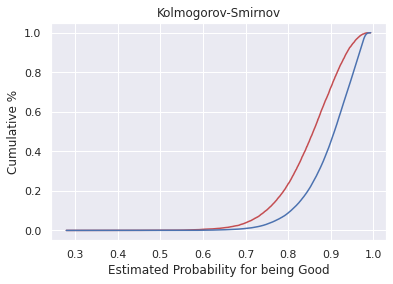

In [77]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [78]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.2811480801769049

### Applying the PD Model

Calculating PD of individual accounts

In [79]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [80]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,months_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [81]:
summary_table


,Feature name,Coefficients,p_values
0,Intercept,-1.884811,NaN
1,grade:A,0.213052,4.184145e-175
2,grade:B,0.631913,1.406305e-65
3,grade:C,0.550554,7.163921e-05
4,grade:D,0.529365,4.506847e-76
5,grade:E,0.438347,7.191341e-119
6,grade:F,0.391157,4.177420e-82
7,home_ownership:OWN,0.102818,5.254365e-01
8,home_ownership:MORTGAGE,0.134455,2.173556e-22
9,addr_state:NM_VA,0.188197,5.390194e-01


In [82]:
y_hat_test_proba

array([0.89775888, 0.83646025, 0.92497624, ..., 0.97140693, 0.9523272 ,
       0.96067478])

### Creating a Scorecard

In [83]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.884811,NaN
1,grade:A,0.213052,4.184145e-175
2,grade:B,0.631913,1.406305e-65
3,grade:C,0.550554,7.163921e-05
4,grade:D,0.529365,4.506847e-76
5,grade:E,0.438347,7.191341e-119
6,grade:F,0.391157,4.177420e-82
7,home_ownership:OWN,0.102818,5.254365e-01
8,home_ownership:MORTGAGE,0.134455,2.173556e-22
9,addr_state:NM_VA,0.188197,5.390194e-01


In [84]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'months_since_issue_d:>84',
 'int_rate:>20.281',
 'months_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [85]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,months_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [86]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.884811,NaN
1,1,grade:A,0.213052,4.184145e-175
2,2,grade:B,0.631913,1.406305e-65
3,3,grade:C,0.550554,7.163921e-05
4,4,grade:D,0.529365,4.506847e-76
5,5,grade:E,0.438347,7.191341e-119
6,6,grade:F,0.391157,4.177420e-82
7,7,home_ownership:OWN,0.102818,5.254365e-01
8,8,home_ownership:MORTGAGE,0.134455,2.173556e-22
9,9,addr_state:NM_VA,0.188197,5.390194e-01


In [87]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.884811,NaN,Intercept
1,1,grade:A,0.213052,4.184145e-175,grade
2,2,grade:B,0.631913,1.406305e-65,grade
3,3,grade:C,0.550554,7.163921e-05,grade
4,4,grade:D,0.529365,4.506847e-76,grade
5,5,grade:E,0.438347,7.191341e-119,grade
6,6,grade:F,0.391157,4.177420e-82,grade
7,7,home_ownership:OWN,0.102818,5.254365e-01,home_ownership
8,8,home_ownership:MORTGAGE,0.134455,2.173556e-22,home_ownership
9,9,addr_state:NM_VA,0.188197,5.390194e-01,addr_state


In [88]:
min_score = 300
max_score = 850

In [89]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                       -1.884811
acc_now_delinq                  -0.038794
addr_state                       0.000000
annual_inc                       0.000000
dti                             -0.345274
emp_length                       0.000000
grade                            0.000000
home_ownership                   0.000000
initial_list_status              0.000000
inq_last_6mths                   0.000000
int_rate                         0.000000
months_since_earliest_cr_line   -0.072097
months_since_issue_d             0.000000
mths_since_last_delinq           0.000000
mths_since_last_record           0.000000
purpose                          0.000000
term                             0.000000
verification_status              0.000000
Name: Coefficients, dtype: float64

In [90]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-2.3409752559024697

In [91]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                       -1.884811
acc_now_delinq                   0.000000
addr_state                       0.429226
annual_inc                       0.722007
dti                              0.000000
emp_length                       0.156576
grade                            0.631913
home_ownership                   0.134455
initial_list_status              0.272953
inq_last_6mths                   1.080261
int_rate                         1.946822
months_since_earliest_cr_line    0.244644
months_since_issue_d             0.000000
mths_since_last_delinq           0.093616
mths_since_last_record           1.330877
purpose                          0.490082
term                             0.036807
verification_status              0.131386
Name: Coefficients, dtype: float64

In [92]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.816813994649432

In [93]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.884811,NaN,Intercept,-127.074354
1,1,grade:A,0.213052,4.184145e-175,grade,14.364028
2,2,grade:B,0.631913,1.406305e-65,grade,42.603691
3,3,grade:C,0.550554,7.163921e-05,grade,37.118475
4,4,grade:D,0.529365,4.506847e-76,grade,35.689906
5,5,grade:E,0.438347,7.191341e-119,grade,29.553455
6,6,grade:F,0.391157,4.177420e-82,grade,26.371912
7,7,home_ownership:OWN,0.102818,5.254365e-01,home_ownership,6.932015
8,8,home_ownership:MORTGAGE,0.134455,2.173556e-22,home_ownership,9.064965
9,9,addr_state:NM_VA,0.188197,5.390194e-01,addr_state,12.688258


In [94]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.884811,NaN,Intercept,330.754728
1,1,grade:A,0.213052,4.184145e-175,grade,14.364028
2,2,grade:B,0.631913,1.406305e-65,grade,42.603691
3,3,grade:C,0.550554,7.163921e-05,grade,37.118475
4,4,grade:D,0.529365,4.506847e-76,grade,35.689906
5,5,grade:E,0.438347,7.191341e-119,grade,29.553455
6,6,grade:F,0.391157,4.177420e-82,grade,26.371912
7,7,home_ownership:OWN,0.102818,5.254365e-01,home_ownership,6.932015
8,8,home_ownership:MORTGAGE,0.134455,2.173556e-22,home_ownership,9.064965
9,9,addr_state:NM_VA,0.188197,5.390194e-01,addr_state,12.688258


In [95]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.884811,NaN,Intercept,330.754728,331.0
1,1,grade:A,0.213052,4.184145e-175,grade,14.364028,14.0
2,2,grade:B,0.631913,1.406305e-65,grade,42.603691,43.0
3,3,grade:C,0.550554,7.163921e-05,grade,37.118475,37.0
4,4,grade:D,0.529365,4.506847e-76,grade,35.689906,36.0
5,5,grade:E,0.438347,7.191341e-119,grade,29.553455,30.0
6,6,grade:F,0.391157,4.177420e-82,grade,26.371912,26.0
7,7,home_ownership:OWN,0.102818,5.254365e-01,home_ownership,6.932015,7.0
8,8,home_ownership:MORTGAGE,0.134455,2.173556e-22,home_ownership,9.064965,9.0
9,9,addr_state:NM_VA,0.188197,5.390194e-01,addr_state,12.688258,13.0


In [96]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [97]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [98]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [99]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.884811,NaN,Intercept,330.754728,331.0,0.245272
1,1,grade:A,0.213052,4.184145e-175,grade,14.364028,14.0,-0.364028
2,2,grade:B,0.631913,1.406305e-65,grade,42.603691,43.0,0.396309
3,3,grade:C,0.550554,7.163921e-05,grade,37.118475,37.0,-0.118475
4,4,grade:D,0.529365,4.506847e-76,grade,35.689906,36.0,0.310094
5,5,grade:E,0.438347,7.191341e-119,grade,29.553455,30.0,0.446545
6,6,grade:F,0.391157,4.177420e-82,grade,26.371912,26.0,-0.371912
7,7,home_ownership:OWN,0.102818,5.254365e-01,home_ownership,6.932015,7.0,0.067985
8,8,home_ownership:MORTGAGE,0.134455,2.173556e-22,home_ownership,9.064965,9.0,-0.064965
9,9,addr_state:NM_VA,0.188197,5.390194e-01,addr_state,12.688258,13.0,0.311742


In [100]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][45] = -2
#df_scorecard['Score - Final'][17] = 19
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.884811,NaN,Intercept,330.754728,331.0,0.245272,331.0
1,1,grade:A,0.213052,4.184145e-175,grade,14.364028,14.0,-0.364028,14.0
2,2,grade:B,0.631913,1.406305e-65,grade,42.603691,43.0,0.396309,43.0
3,3,grade:C,0.550554,7.163921e-05,grade,37.118475,37.0,-0.118475,37.0
4,4,grade:D,0.529365,4.506847e-76,grade,35.689906,36.0,0.310094,36.0
5,5,grade:E,0.438347,7.191341e-119,grade,29.553455,30.0,0.446545,30.0
6,6,grade:F,0.391157,4.177420e-82,grade,26.371912,26.0,-0.371912,26.0
7,7,home_ownership:OWN,0.102818,5.254365e-01,home_ownership,6.932015,7.0,0.067985,7.0
8,8,home_ownership:MORTGAGE,0.134455,2.173556e-22,home_ownership,9.064965,9.0,-0.064965,9.0
9,9,addr_state:NM_VA,0.188197,5.390194e-01,addr_state,12.688258,13.0,0.311742,13.0


In [101]:
df_scorecard.groupby('Original feature name')['Score - Final'].min()

Original feature name
Intercept                        331.0
acc_now_delinq                    -3.0
addr_state                         0.0
annual_inc                         0.0
dti                              -23.0
emp_length                         0.0
grade                              0.0
home_ownership                     0.0
initial_list_status                0.0
inq_last_6mths                     0.0
int_rate                          -2.0
months_since_earliest_cr_line     -5.0
months_since_issue_d               0.0
mths_since_last_delinq             0.0
mths_since_last_record             0.0
purpose                            0.0
term                               0.0
verification_status                0.0
Name: Score - Final, dtype: float64

In [102]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

298.0

In [103]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

### Caclulating Credit Score

In [104]:
print(inputs_test_with_ref_cat.shape)
inputs_test_with_ref_cat.head()

(93257, 101)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,months_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [105]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [106]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [107]:
print(inputs_test_with_ref_cat_w_intercept.shape)
inputs_test_with_ref_cat_w_intercept.head()

(93257, 102)


,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,months_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,months_since_earliest_cr_line:<140,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [108]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
print(inputs_test_with_ref_cat_w_intercept.shape)

(93257, 102)


In [109]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,months_since_issue_d:>84,int_rate:>20.281,months_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


In [110]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.884811,NaN,Intercept,330.754728,331.0,0.245272,331.0
1,1,grade:A,0.213052,4.184145e-175,grade,14.364028,14.0,-0.364028,14.0
2,2,grade:B,0.631913,1.406305e-65,grade,42.603691,43.0,0.396309,43.0
3,3,grade:C,0.550554,7.163921e-05,grade,37.118475,37.0,-0.118475,37.0
4,4,grade:D,0.529365,4.506847e-76,grade,35.689906,36.0,0.310094,36.0


In [111]:
scorecard_scores = df_scorecard['Score - Final']
print(scorecard_scores.shape)
scorecard_scores.head()

(102,)


0    331.0
1     14.0
2     43.0
3     37.0
4     36.0
Name: Score - Final, dtype: float64

In [112]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [113]:
scorecard_scores.shape

(102,)

In [114]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [115]:
scorecard_scores.shape

(102, 1)

In [116]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,months_since_issue_d:<38,months_since_issue_d:38-39,months_since_issue_d:40-41,months_since_issue_d:42-48,months_since_issue_d:49-52,months_since_issue_d:53-64,months_since_issue_d:65-84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,months_since_earliest_cr_line:141-164,months_since_earliest_cr_line:165-247,months_since_earliest_cr_line:248-270,months_since_earliest_cr_line:271-352,months_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,initial_list_status:f,term:60,emp_length:0,months_since_issue_d:>84,int_rate:>20.281,months_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0


In [117]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [118]:
y_scores.head()

,0
362514,604.0
288564,568.0
213591,627.0
263083,629.0
165001,697.0


In [119]:
y_scores.tail()

,0
115,620.0
296284,669.0
61777,694.0
91763,658.0
167512,672.0


In [120]:
df_scorecard.groupby(['Original feature name','Feature name'])['Score - Final'].mean()

Original feature name          Feature name                                
Intercept                      Intercept                                       331.0
acc_now_delinq                 acc_now_delinq:0                                  0.0
                               acc_now_delinq:>=1                               -3.0
addr_state                     addr_state:AR_MI_PA_OH_MN                        14.0
                               addr_state:CA                                    10.0
                               addr_state:GA_WA_OR                              18.0
                               addr_state:IL_CT                                 25.0
                               addr_state:KS_SC_CO_VT_AK_MS                     28.0
                               addr_state:ND_NE_IA_NV_FL_HI_AL                   0.0
                               addr_state:NM_VA                                 13.0
                               addr_state:NY                              

### From Credit Score to PD

In [121]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [122]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

,0
362514,0.897344
288564,0.836730
213591,0.924784
263083,0.926822
165001,0.972009


In [123]:
y_hat_test_proba[0: 5]

array([0.89775888, 0.83646025, 0.92497624, 0.92825377, 0.97241717])

In [124]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.279168,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.304756,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.358685,0,3,2,1,0.000032,0.000024,0.000098
3,42396,0,0.365036,0,4,2,2,0.000043,0.000024,0.000196
4,40518,0,0.405184,0,5,2,3,0.000054,0.000024,0.000294


### Setting Cut-offs

In [125]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [126]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7354,2836
1,37140,45927


In [127]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078857,0.030411
1,0.398254,0.492478


In [128]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5713351276579774

In [129]:
from sklearn.metrics import roc_curve, roc_auc_score

In [130]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99970559, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 6.74154598e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99382968, 0.99382968, 0.98873048, ..., 0.40662392, 0.35868495,
        0.27916847]))

In [131]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [132]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.279168,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.304756,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.358685,0,3,2,1,0.000032,0.000024,0.000098
3,42396,0,0.365036,0,4,2,2,0.000043,0.000024,0.000196
4,40518,0,0.405184,0,5,2,3,0.000054,0.000024,0.000294


Text(0.5, 1.0, 'ROC curve')

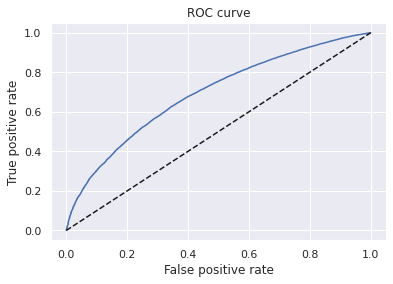

In [133]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [134]:
thresholds

array([1.99382968, 0.99382968, 0.98873048, ..., 0.40662392, 0.35868495,
       0.27916847])

In [135]:
thresholds.shape

(17890,)

In [136]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [137]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [138]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.993830,0.000000,0.000000
1,0.993830,0.000000,0.000012
2,0.988730,0.000000,0.000674
3,0.988713,0.000098,0.000674
4,0.988153,0.000098,0.000939


In [139]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [140]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.993830,0.000000,0.000012
2,0.988730,0.000000,0.000674
3,0.988713,0.000098,0.000674
4,0.988153,0.000098,0.000939


In [141]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [142]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,2935.0
1,0.993830,0.000000,0.000012,800.0
2,0.988730,0.000000,0.000674,759.0
3,0.988713,0.000098,0.000674,759.0
4,0.988153,0.000098,0.000939,756.0


In [143]:
df_cutoffs['Score'][0] = max_score

In [144]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.993830,0.000000,0.000012,800.0
2,0.988730,0.000000,0.000674,759.0
3,0.988713,0.000098,0.000674,759.0
4,0.988153,0.000098,0.000939,756.0


In [145]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17885,0.453721,0.999509,0.999940,445.0
17886,0.424819,0.999706,0.999940,437.0
17887,0.406624,0.999706,0.999976,432.0
17888,0.358685,1.000000,0.999976,419.0
17889,0.279168,1.000000,1.000000,394.0


In [146]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [147]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [148]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.993830,0.000000,0.000012,800.0,1,93256,0.000011,0.999989
2,0.988730,0.000000,0.000674,759.0,56,93201,0.000600,0.999400
3,0.988713,0.000098,0.000674,759.0,57,93200,0.000611,0.999389
4,0.988153,0.000098,0.000939,756.0,79,93178,0.000847,0.999153


In [149]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17885,0.453721,0.999509,0.999940,445.0,93247,10,0.999893,0.000107
17886,0.424819,0.999706,0.999940,437.0,93249,8,0.999914,0.000086
17887,0.406624,0.999706,0.999976,432.0,93252,5,0.999946,0.000054
17888,0.358685,1.000000,0.999976,419.0,93255,2,0.999979,0.000021
17889,0.279168,1.000000,1.000000,394.0,93257,0,1.000000,0.000000


In [150]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.906694,0.242787,0.512008,611.0,45005,48252,0.482591,0.517409
5001,0.906693,0.242885,0.512008,611.0,45006,48251,0.482602,0.517398
5002,0.906629,0.242885,0.512394,611.0,45038,48219,0.482945,0.517055
5003,0.906628,0.242983,0.512394,611.0,45039,48218,0.482956,0.517044
5004,0.906626,0.242983,0.512406,611.0,45040,48217,0.482966,0.517034
5005,0.906624,0.243081,0.512406,611.0,45041,48216,0.482977,0.517023
5006,0.906607,0.243081,0.512598,611.0,45057,48200,0.483149,0.516851
5007,0.906605,0.243180,0.512598,611.0,45058,48199,0.483159,0.516841
5008,0.906595,0.243180,0.512670,611.0,45064,48193,0.483224,0.516776
5009,0.906593,0.243278,0.512670,611.0,45065,48192,0.483235,0.516765


In [155]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.956622,0.042198,0.176556,666.0,15096,78161,0.161875,0.838125
1001,0.956619,0.042296,0.176556,666.0,15097,78160,0.161886,0.838114
1002,0.956585,0.042296,0.176821,666.0,15119,78138,0.162122,0.837878
1003,0.956585,0.042395,0.176821,666.0,15120,78137,0.162133,0.837867
1004,0.956511,0.042395,0.177255,666.0,15156,78101,0.162519,0.837481
1005,0.956511,0.042493,0.177255,666.0,15157,78100,0.162529,0.837471
1006,0.956485,0.042493,0.177375,666.0,15167,78090,0.162637,0.837363
1007,0.956484,0.042591,0.177375,666.0,15168,78089,0.162647,0.837353
1008,0.956468,0.042591,0.177459,666.0,15175,78082,0.162722,0.837278
1009,0.956463,0.042689,0.177459,666.0,15176,78081,0.162733,0.837267


In [153]:
inputs_train_with_ref_cat.to_csv('/content/drive/MyDrive/Jovian/Credit/inputs_train_with_ref_cat.csv')

In [154]:
df_scorecard.to_csv('/content/drive/MyDrive/Jovian/Credit/df_scorecard.csv')

### Population Stability Index: